In [1]:
import cv2
import os


In [2]:
# Create the main dataset directory and subfolders
main_folder = "mydigits_dataset"
subfolders = ['1', '2', '3', '4']

if not os.path.exists(main_folder):
    os.makedirs(main_folder)

# Create subfolders
for subfolder in subfolders:
    folder_path = os.path.join(main_folder, subfolder)
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)


In [4]:
# Open the webcam
cap = cv2.VideoCapture(0)  # 0 is typically the default webcam index

if not cap.isOpened():
    print("Error: Could not open webcam.")
else:
    print("Press 'q' to quit.")

while True:
    ret, frame = cap.read()
    if not ret:
        print("Failed to grab frame.")
        break
    cv2.imshow('Camera Preview', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


Press 'q' to quit.


In [3]:
# Function to capture and save frames from video, with start/stop functionality
def capture_and_save_frames_manual(folder_name):
    cap = cv2.VideoCapture(0)
    recording = False
    frame_count = 0
    
    if not cap.isOpened():
        print("Error: Could not open webcam.")
        return

    print("Press 'r' to start recording, 's' to stop, and 'q' to quit.")
    
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Failed to grab frame.")
            break

        # Display the live feed
        cv2.imshow('Camera', frame)
        
        key = cv2.waitKey(1) & 0xFF
        
        if key == ord('r'):  # Start recording
            print("Recording started...")
            recording = True
        
        elif key == ord('s'):  # Stop recording
            print("Recording stopped.")
            recording = False
        
        elif key == ord('q'):  # Quit the program
            print("Quitting...")
            break

        # If recording, save the frames to the folder
        if recording:
            frame_path = os.path.join(main_folder, folder_name, f"frame_{frame_count}.png")
            cv2.imwrite(frame_path, frame)
            frame_count += 1

    cap.release()
    cv2.destroyAllWindows()


In [4]:
capture_and_save_frames_manual('1')

Press 'r' to start recording, 's' to stop, and 'q' to quit.
Recording started...
Recording stopped.
Quitting...


In [5]:
capture_and_save_frames_manual('2')


Press 'r' to start recording, 's' to stop, and 'q' to quit.
Recording started...
Recording stopped.
Quitting...


In [6]:
capture_and_save_frames_manual('3')


Press 'r' to start recording, 's' to stop, and 'q' to quit.
Recording started...
Recording stopped.
Quitting...


In [7]:
capture_and_save_frames_manual('4')


Press 'r' to start recording, 's' to stop, and 'q' to quit.
Recording started...
Recording stopped.
Quitting...


In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import os


2024-11-26 22:18:26.129686: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-26 22:18:26.139716: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732655906.151497  266493 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732655906.155114  266493 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-26 22:18:26.167627: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [4]:
# Define the paths and image dimensions
main_folder = "mydigits_dataset"
img_height, img_width = 50, 20  # Assuming the images are 28x28 pixels
batch_size = 8


In [3]:
# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255#,  # Normalize pixel values
#    rotation_range=10,  # Randomly rotate images by 10 degrees
#    width_shift_range=0.3,  # Shift images horizontally by 10%
#    height_shift_range=0.3,  # Shift images vertically by 10%
#    shear_range=0.3,  # Shear transformations
#    zoom_range=0.3,  # Zoom in or out
#    horizontal_flip=False,  # No horizontal flip for digit classification
#    validation_split=0.2  # Reserve 20% of data for validation
)

# No data augmentation for validation, only rescaling
validation_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Load the data from the directories
train_generator = train_datagen.flow_from_directory(
    main_folder,
    target_size=(img_height, img_width),
    color_mode='rgb',  # Since the images are likely grayscale
    batch_size=batch_size,
    class_mode='categorical',  # 4 output classes, so categorical labels
    subset='training'
)

validation_generator = validation_datagen.flow_from_directory(
    main_folder,
    target_size=(img_height, img_width),
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 5317 images belonging to 4 classes.
Found 1061 images belonging to 4 classes.


In [4]:
import os
os.environ['TF_GPU_ALLOCATOR'] = 'cuda_malloc_async'

from tensorflow.keras import backend as K
K.clear_session()


In [5]:
from tensorflow.keras import Input

# Define the CNN model
model = Sequential([
    Input(shape=(img_height, img_width, 3)),  # Input is grayscale (1 channel) rgb 3

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),

    # Output layer with 4 units (for 4 classes) and softmax activation
    Dense(4, activation='softmax')
])


I0000 00:00:1732655922.375200  266493 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5723 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


In [6]:
# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',  # Multi-class classification
    metrics=['accuracy']
)


In [7]:
# Train the model
epochs = 5

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // (batch_size*epochs),
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // (batch_size*epochs),
    epochs=epochs
)


Epoch 1/5


/home/jc/KLIT/tf/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1732650813.568359  154664 service.cc:148] XLA service 0x77432800b0e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732650813.568389  154664 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2024-11-26 20:53:33.589093: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1732650813.670556  154664 cuda_dnn.cc:529] Loaded cuDNN version 90501
I0000 00:00:1732650817.571510  154664 device

132/132 ━━━━━━━━━━━━━━━━━━━━ 19s 104ms/step - accuracy: 0.4516 - loss: 5.6726 - val_accuracy: 0.9712 - val_loss: 0.1399
Epoch 2/5
132/132 ━━━━━━━━━━━━━━━━━━━━ 15s 117ms/step - accuracy: 0.9637 - loss: 0.1109 - val_accuracy: 1.0000 - val_loss: 0.0038
Epoch 3/5
132/132 ━━━━━━━━━━━━━━━━━━━━ 13s 95ms/step - accuracy: 0.9924 - loss: 0.0154 - val_accuracy: 1.0000 - val_loss: 1.7844e-04
Epoch 4/5
132/132 ━━━━━━━━━━━━━━━━━━━━ 12s 91ms/step - accuracy: 0.9948 - loss: 0.0141 - val_accuracy: 0.9952 - val_loss: 0.0167
Epoch 5/5
132/132 ━━━━━━━━━━━━━━━━━━━━ 11s 81ms/step - accuracy: 0.9993 - loss: 0.0047 - val_accuracy: 1.0000 - val_loss: 9.0623e-04


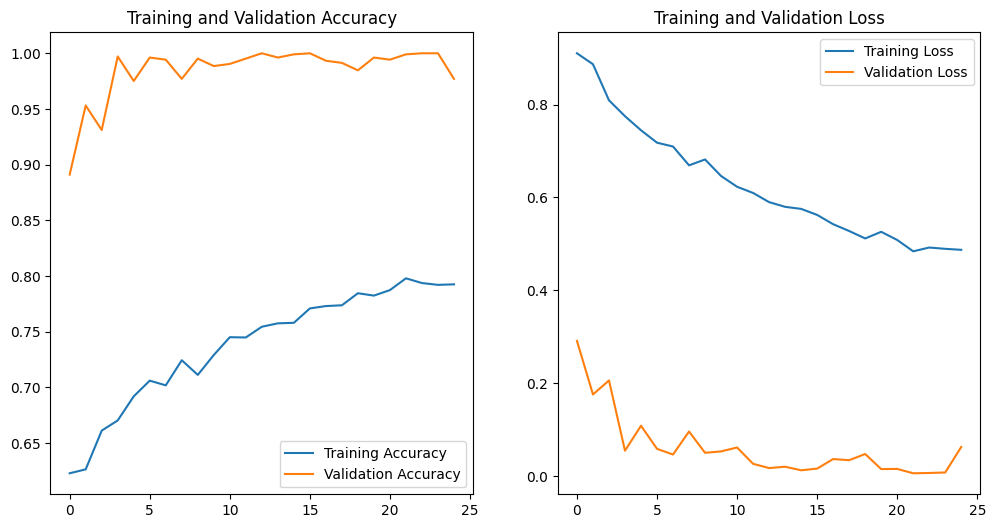

In [15]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()


In [13]:
# Save the model to a file
model.save("digit_classifier_model.keras")


In [12]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load your trained model
model = load_model("digit_classifier_model.keras")


# Class labels corresponding to digits 1, 2, 3, and 4
class_labels = [1, 2, 3, 4]

# Function to preprocess the image before feeding into the model
def preprocess_frame(frame):
    # Convert the frame to grayscale
    #gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Resize the frame to img_heightximg_width pixels
    resized = cv2.resize(frame, (img_height, img_width))
    
    # Normalize the image (as your training data would have been normalized)
    normalized = resized / 255.0
    
    # Reshape to match the input shape of your model (batch_size, height, width, channels)
    reshaped = normalized.reshape(1, img_height, img_width, 3)
    
    return reshaped


# Initialize camera capture
cap = cv2.VideoCapture(0)

while True:
    # Capture frame-by-frame from the camera
    ret, frame = cap.read()
    
    if not ret:
        print("Failed to capture frame")
        break

    # Preprocess the frame for the model
    processed_frame = preprocess_frame(frame)
    
    # Perform inference
    predictions = model.predict(processed_frame, verbose=0)
    
    # Get the probabilities for digits 1, 2, 3, 4
    probabilities = predictions[0]  # Assuming your model outputs probabilities for 4 classes
    
    # Display the probabilities on the frame
    for i, prob in enumerate(probabilities):
        text = f"Digit {class_labels[i]}: {prob:.2f}"
        cv2.putText(frame, text, (10, 30 + i * 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

    # Show the frame with probabilities
    cv2.imshow('Digit Prediction', frame)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything is done, release the capture and close windows
cap.release()
cv2.destroyAllWindows()


In [20]:
import cv2
import numpy as np

def detect_digit_and_draw_rectangle(frame):
    # Step 1: Convert to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Step 2: Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Step 3: Use Canny edge detector to find edges of the digit
    edges = cv2.Canny(blurred, 50, 150)

    # Step 4: Find contours in the edges image
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Step 5: Filter out small contours and keep only the largest one (likely the digit)
    contours = [cnt for cnt in contours if cv2.contourArea(cnt) > 500]  # Area threshold to filter small contours
    
    if contours:
        # Find the largest contour, assuming it's the digit
        largest_contour = max(contours, key=cv2.contourArea)

        # Step 6: Get the bounding box for the largest contour (digit)
        x, y, w, h = cv2.boundingRect(largest_contour)

        # Step 7: Draw the rectangle around the detected digit
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Draw rectangle in green

        # Optionally, crop the image to the detected region (digit and surrounding white space)
        cropped_image = frame[y:y+h, x:x+w]
    else:
        cropped_image = None

    return frame, cropped_image

# Initialize camera capture
cap = cv2.VideoCapture(0)

while True:
    # Capture frame-by-frame from the camera
    ret, frame = cap.read()

    if not ret:
        print("Failed to capture frame")
        break

    # Process the frame to detect the digit and draw the rectangle
    frame_with_rectangle, cropped_digit = detect_digit_and_draw_rectangle(frame)

    # Show the frame with the drawn rectangle
    cv2.imshow('Live Camera Feed - Digit Detection', frame_with_rectangle)

    # Optionally, show the cropped image of the detected digit
    if cropped_digit is not None:
        cv2.imshow('Cropped Digit', cropped_digit)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything is done, release the capture and close windows
cap.release()
cv2.destroyAllWindows()


In [22]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load your trained model
model = load_model("digit_classifier_model.keras")

# Class labels corresponding to digits 1, 2, 3, and 4
class_labels = [1, 2, 3, 4]

# Function to preprocess the image before feeding into the model
def preprocess_frame(frame):
    # Resize the frame to img_heightximg_width pixels
    resized = cv2.resize(frame, (img_height, img_width))
    
    # Normalize the image (as your training data would have been normalized)
    normalized = resized / 255.0
    
    # Reshape to match the input shape of your model (batch_size, height, width, channels)
    reshaped = normalized.reshape(1, img_height, img_width, 3)
    
    return reshaped


# Function to detect the digit and draw a rectangle around it
def detect_digit_and_draw_rectangle(frame):
    # Step 1: Convert to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Step 2: Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Step 3: Use Canny edge detector to find edges of the digit
    edges = cv2.Canny(blurred, 50, 150)

    # Step 4: Find contours in the edges image
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Step 5: Filter out small contours and keep only the largest one (likely the digit)
    contours = [cnt for cnt in contours if cv2.contourArea(cnt) > 500]  # Area threshold to filter small contours
    
    if contours:
        # Find the largest contour, assuming it's the digit
        largest_contour = max(contours, key=cv2.contourArea)

        # Step 6: Get the bounding box for the largest contour (digit)
        x, y, w, h = cv2.boundingRect(largest_contour)

        # Step 7: Draw the rectangle around the detected digit
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Draw rectangle in green

        # Optionally, crop the image to the detected region (digit and surrounding white space)
        cropped_image = frame[y:y+h, x:x+w]
    else:
        cropped_image = None

    return frame, cropped_image


# Initialize camera capture
cap = cv2.VideoCapture(0)

while True:
    # Capture frame-by-frame from the camera
    ret, frame = cap.read()
    
    if not ret:
        print("Failed to capture frame")
        break

    # Detect the digit and draw the bounding rectangle
    frame_with_rectangle, cropped_digit = detect_digit_and_draw_rectangle(frame)

    if cropped_digit is not None:
        # Preprocess the cropped image for the model
        processed_frame = preprocess_frame(cropped_digit)
        
        # Perform inference
        predictions = model.predict(processed_frame, verbose=0)
        
        # Get the probabilities for digits 1, 2, 3, 4
        probabilities = predictions[0]  # Assuming your model outputs probabilities for 4 classes
        
        # Display the probabilities on the frame
        for i, prob in enumerate(probabilities):
            text = f"Digit {class_labels[i]}: {prob:.2f}"
            cv2.putText(frame_with_rectangle, text, (10, 30 + i * 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

    # Show the frame with the drawn rectangle and predictions
    cv2.imshow('Digit Prediction', frame_with_rectangle)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything is done, release the capture and close windows
cap.release()
cv2.destroyAllWindows()


In [24]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

batch_size = 16

# Custom function to crop the digit from the image
def crop_digit_from_image(image):
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Ensure the image is in the correct format for Canny (uint8)
    blurred = np.uint8(blurred * 255)  # Scale the image back to 0-255 range

    # Use Canny edge detector to find edges of the digit
    edges = cv2.Canny(blurred, 50, 150)

    # Find contours
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter out small contours
    contours = [cnt for cnt in contours if cv2.contourArea(cnt) > 500]

    if contours:
        # Find the largest contour (likely the digit)
        largest_contour = max(contours, key=cv2.contourArea)

        # Get the bounding box for the largest contour
        x, y, w, h = cv2.boundingRect(largest_contour)

        # Crop the image to the bounding box
        cropped_image = image[y:y+h, x:x+w]
        return cropped_image
    else:
        return image  # Return the original image if no digit is found

# Custom generator to apply cropping on the images before training
def custom_crop_generator(generator):
    for x_batch, y_batch in generator:
        cropped_images = []

        for img in x_batch:
            # Crop the digit from each image
            cropped_img = crop_digit_from_image(img)

            # Resize the cropped image to match the input size of the model
            cropped_resized_img = cv2.resize(cropped_img, (img_height, img_width))

            # Append the resized cropped image to the list
            cropped_images.append(cropped_resized_img)

        # Convert the list of cropped images back to a numpy array
        cropped_images = np.array(cropped_images)
        
        # Yield the cropped and resized images and their corresponding labels
        yield cropped_images, y_batch


# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values

)

# No data augmentation for validation, only rescaling
validation_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Load the data from the directories
train_generator = train_datagen.flow_from_directory(
    main_folder,
    target_size=(img_height, img_width),
    color_mode='rgb',  # RGB images
    batch_size=batch_size,
    class_mode='categorical',  # 4 output classes
    subset='training'
)

validation_generator = validation_datagen.flow_from_directory(
    main_folder,
    target_size=(img_height, img_width),
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Create custom generators
train_crop_generator = custom_crop_generator(train_generator)
validation_crop_generator = custom_crop_generator(validation_generator)

# Now you can train your model with the cropped images:
epochs = 5
history = model.fit(
    train_crop_generator,
    steps_per_epoch=train_generator.samples // (batch_size),
    validation_data=validation_crop_generator,
    validation_steps=validation_generator.samples // (batch_size),
    epochs=epochs
)

# Save the model to a file
model.save("digit_classifier_model.keras")

Found 5317 images belonging to 4 classes.
Found 1061 images belonging to 4 classes.
Epoch 1/5
165/332 ━━━━━━━━━━━━━━━━━━━━ 15s 96ms/step - accuracy: 0.9975 - loss: 0.0100

KeyboardInterrupt: 